In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Datafile
data = pd.read_csv('CCPP_data.csv')
df = pd.DataFrame(data)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


<AxesSubplot:>

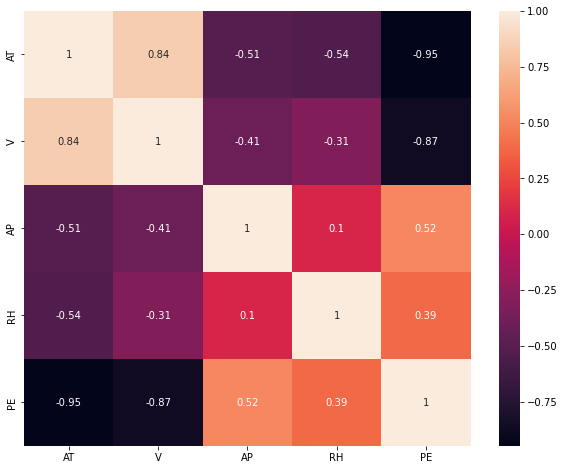

In [5]:
plt.figure(figsize = (10, 8))
plt.tight_layout()
sns.heatmap(df.corr(), annot = True)

In [6]:
#AT and V have negative correlation with PE.  High positive correlation with each other
#AP and RH have weak positive correlation with PE
df_1 = df[['AT']]
df_2 = df[['AT', 'AP']]
df_3 = df [['AT', 'V', 'AP', 'RH']]
# PE as the target variable will equal y
y = df['PE']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def build_model (df_model):
    X_train, X_test, y_train, y_test = train_test_split(df_model, y, test_size = 0.2, random_state = 0)
    print(">> Linear Regression")
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred_linear_reg = regressor.predict(X_test)
    
    print(">> Decision Tree")
    dt_regressor = DecisionTreeRegressor()
    dt_regressor.fit(X_train, y_train)
    y_pred_dt_reg = dt_regressor.predict(X_test)
    
    print(">> Random Forest")
    rf_regressor = RandomForestRegressor(n_estimators=100)
    rf_regressor.fit(X_train, y_train)
    y_pred_rf_reg = rf_regressor.predict(X_test)
    
    return [y_test, y_pred_linear_reg, y_pred_dt_reg, y_pred_rf_reg]

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

def score_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    
    return [rmse, mae, r_squared]

In [9]:
def get_score_list(df_model):
    y_list = []
    y_list = build_model(df_model)
    print(">> Generating List")
    linear_reg_score_list = score_metrics (y_list[0], y_list[1])
    dt_reg_score_list = score_metrics (y_list[0], y_list[2])
    rf_reg_score_list = score_metrics (y_list[0], y_list[3])
    
    
    return [linear_reg_score_list, dt_reg_score_list, rf_reg_score_list]

In [10]:
print("Model 1....")
df_1_score_list = get_score_list(df_1)
print (df_1_score_list)

print("Model 2....")
df_2_score_list = get_score_list(df_2)
print (df_2_score_list)

print("Model 3....")
df_3_score_list = get_score_list(df_3)
print (df_3_score_list)

Model 1....
>> Linear Regression
>> Decision Tree
>> Random Forest
>> Generating List
[[5.272562059337883, 4.174438156494202, 0.9049536175690113], [5.93651805220736, 4.633473127113801, 0.8795086758953446], [5.690365205066203, 4.449007635166193, 0.8892936654565008]]
Model 2....
>> Linear Regression
>> Decision Tree
>> Random Forest
>> Generating List
[[5.223087701137587, 4.179259885858517, 0.9067289581909649], [6.712551313849738, 5.08837513061651, 0.8459479688662046], [5.069148047248794, 3.9232111241727567, 0.9121458782010816]]
Model 3....
>> Linear Regression
>> Decision Tree
>> Random Forest
>> Generating List
[[4.442262858442492, 3.566564655203823, 0.9325315554761302], [4.8159129350642464, 3.1280721003134797, 0.9207043350767589], [3.1948437510716787, 2.3457928944618613, 0.9651027312769066]]


In [11]:
def print_result(df_score_list):
    print("Linear Regression")
    print("1. Root Mean Squared Error (RMSE) = ", df_score_list[0][0])
    print("2. Mean Absolute Error (MAE) = ", df_score_list[0][1])
    print("3. R Squared = ", df_score_list[0][2])
    
    print("Decision Tree")
    print("1. Root Mean Squared Error (RMSE) = ", df_score_list[1][0])
    print("2. Mean Absolute Error (MAE) = ", df_score_list[1][1])
    print("3. R Squared = ", df_score_list[1][2])
    
    print("Random forest")
    print("1. Root Mean Squared Error (RMSE) = ", df_score_list[2][0])
    print("2. Mean Absolute Error (MAE) = ", df_score_list[2][1])
    print("3. R Squared = ", df_score_list[2][2])

In [12]:
print_result(df_1_score_list)

Linear Regression
1. Root Mean Squared Error (RMSE) =  5.272562059337883
2. Mean Absolute Error (MAE) =  4.174438156494202
3. R Squared =  0.9049536175690113
Decision Tree
1. Root Mean Squared Error (RMSE) =  5.93651805220736
2. Mean Absolute Error (MAE) =  4.633473127113801
3. R Squared =  0.8795086758953446
Random forest
1. Root Mean Squared Error (RMSE) =  5.690365205066203
2. Mean Absolute Error (MAE) =  4.449007635166193
3. R Squared =  0.8892936654565008


In [13]:
print_result(df_2_score_list)

Linear Regression
1. Root Mean Squared Error (RMSE) =  5.223087701137587
2. Mean Absolute Error (MAE) =  4.179259885858517
3. R Squared =  0.9067289581909649
Decision Tree
1. Root Mean Squared Error (RMSE) =  6.712551313849738
2. Mean Absolute Error (MAE) =  5.08837513061651
3. R Squared =  0.8459479688662046
Random forest
1. Root Mean Squared Error (RMSE) =  5.069148047248794
2. Mean Absolute Error (MAE) =  3.9232111241727567
3. R Squared =  0.9121458782010816


In [14]:
print_result(df_3_score_list)

Linear Regression
1. Root Mean Squared Error (RMSE) =  4.442262858442492
2. Mean Absolute Error (MAE) =  3.566564655203823
3. R Squared =  0.9325315554761302
Decision Tree
1. Root Mean Squared Error (RMSE) =  4.8159129350642464
2. Mean Absolute Error (MAE) =  3.1280721003134797
3. R Squared =  0.9207043350767589
Random forest
1. Root Mean Squared Error (RMSE) =  3.1948437510716787
2. Mean Absolute Error (MAE) =  2.3457928944618613
3. R Squared =  0.9651027312769066


In [ ]:
#Random Forest Algorithm with Model 3 (all features). 
#The R Squared value of 0.965 means that 96.5% of the variance can be explained
#Model 3 also has the smallest RMSE and MAE